In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd UltimatumGame

/Users/ArendHintze/Dropbox/notebooks/UltimatumGame


In [3]:
from pandas import *

In [3]:
from pandas import *
filename='LOD.txt'
data=read_csv(filename, sep=",",na_values=[""," "])
S=[]
A=[]
C=[]
for i in range(0,11):
    plot(data["born"],data["split{0}".format(i)],'black')
    plot(data["born"],data["accept{0}".format(i)],'red')
    S.append(mean(data["split{0}".format(i)]))
    A.append(mean(data["accept{0}".format(i)]))
    C.appemd(mean(data["consult{0}".format(i)]))

IOError: File LOD.txt does not exist

In [3]:
def expandLOD(data,updates):
    P=[]
    Q=[]
    t=0
    P.append(data['p'][0])
    Q.append(data['q'][0])
    for i in range(0,updates):
        if(i<data['born'][t+1]):
            t=t
        else:
            t=t+1
        P.append(data['p'][t])
        Q.append(data['q'][t])
            
    return P,Q

In [6]:
import numpy as np
import scipy.stats as st

# returns confidence interval of mean
def confIntMean(a, conf=0.95):
    mean, sem, m = np.mean(a), st.sem(a), st.t.ppf((1+conf)/2., len(a)-1)
    return mean - m*sem, mean + m*sem

print (confIntMean([1,2,3,4,5],conf=0.95))

(1.0367568385224391, 4.9632431614775605)


the ultimatum game with a tag and depending on minimum tag threshold

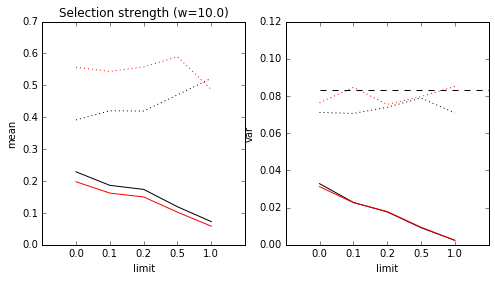

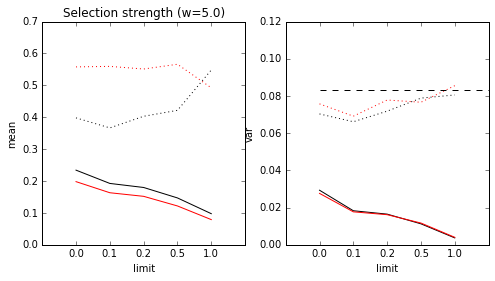

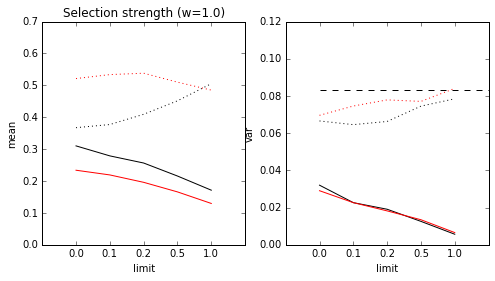

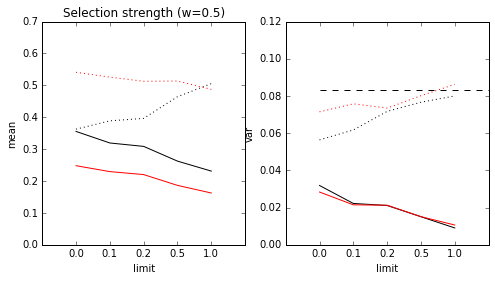

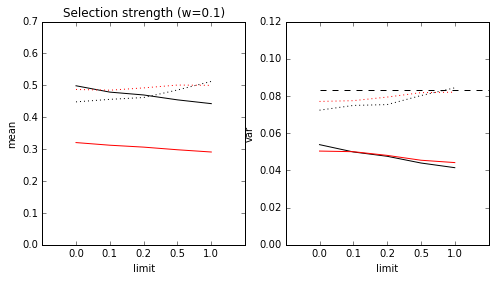

In [8]:
from pandas import *
U=0.01;
Ws=(10.0,5.0,1.0,0.5,0.1)
#Fs=(0.1,0.5,1.0)
F=0.1
THs=(0.0,0.1,0.2,0.5,1.0)
anz=100
targetGen=4900000
subplots_adjust(wspace=.25)
subplots_adjust(hspace=.25) 
for W in Ws:
    figure(num=None, figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
    b=0
    psa=[]
    qsa=[]
    poa=[]
    qoa=[]
    ida=[]
    tha=[]
    vpo=[]
    vqo=[]
    vps=[]
    vqs=[]
    for TH in THs:
        PS_LOD=[];
        QS_LOD=[];
        PO_LOD=[];
        QO_LOD=[];
        ID_LOD=[];
        TH_LOD=[];
        actAnz=anz;
        for N in range(0,anz):
            filename="/Users/ahintze/Science/UltimatumGame/work/dataTag/LOD_TAG_{0:0.02f}_{1:0.01f}_{2:0.01f}_{3:03d}.txt".format(U,W,TH,N)
#            filename="/Users/arendhintze/iPhone/Science/tarnitaUltimatumGame/work/dataTag/LOD_TAG_{0:0.02f}_{1:0.01f}_{2:0.01f}_{3:03d}.txt".format(U,W,TH,N)
            try:
                data=read_csv(filename, sep=",",na_values=[""," "])
                PS_LOD=concatenate([PS_LOD,data['ps']])
                QS_LOD=concatenate([QS_LOD,data['qs']])
                PO_LOD=concatenate([PO_LOD,data['po']])
                QO_LOD=concatenate([QO_LOD,data['qo']])
                ID_LOD=concatenate([ID_LOD,data['id']])
                TH_LOD=concatenate([TH_LOD,data['th']])
            except Exception:
                print filename
                actAnz=actAnz-1
        psa.append(mean(PS_LOD))
        qsa.append(mean(QS_LOD))
        poa.append(mean(PO_LOD))
        qoa.append(mean(QO_LOD))
        ida.append(mean(ID_LOD))
        tha.append(mean(TH_LOD))
        vps.append(var(PS_LOD))
        vqs.append(var(QS_LOD))
        vpo.append(var(PO_LOD))
        vqo.append(var(QO_LOD))
    subplot(1,2,(b*2)+1)
    plot(range(0,len(THs)),psa,'k')
    plot(range(0,len(THs)),qsa,'r')
    plot(range(0,len(THs)),poa,':k')
    plot(range(0,len(THs)),qoa,':r')
    axis((-1.0,len(THs),0,0.7))
    title('Selection strength (w='+str(W)+')')
    L=[]
    for w in THs:
        L.append(str(w))
    xticks(range(0,len(THs)),L)
    xlabel('limit')
    ylabel('mean')
    subplot(1,2,(b*2)+2)
    b=b+1
    plot(range(0,len(THs)),vps,'k')
    plot(range(0,len(THs)),vqs,'r')    
    plot(range(0,len(THs)),vpo,':k')
    plot(range(0,len(THs)),vqo,':r')
    plot((0,len(THs)),(1.0/12.0,1.0/12.0),'--k')
    #title('Selection strength (w='+str(W)+')')
    xlabel('limit')
    ylabel('var')
    xticks(range(0,len(THs)),L)
    axis((-1.0,len(THs),0,0.12))
    #show()
    savefig('kinSelectionByStrength_{0}.pdf'.format(W))

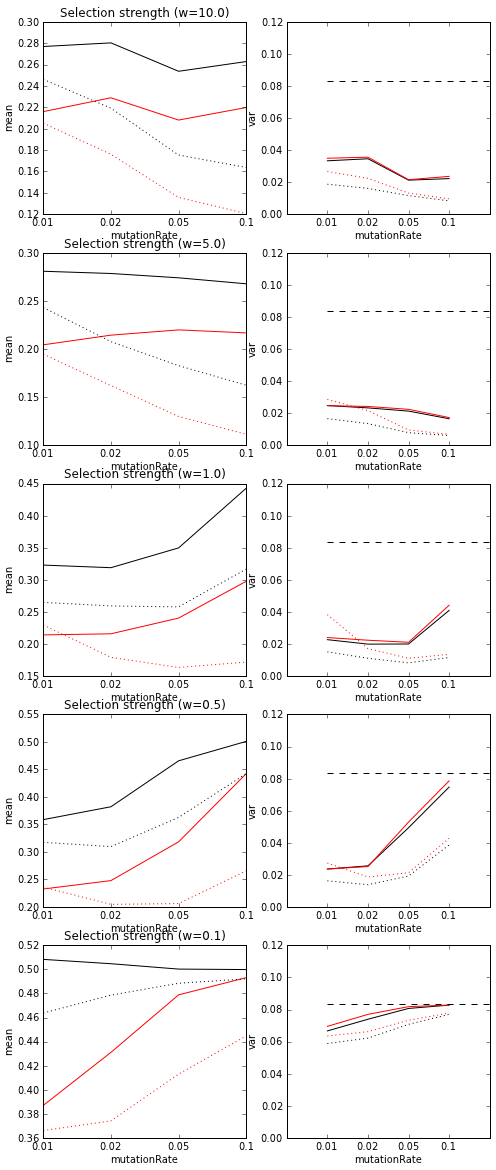

In [11]:
from pandas import *
Us=(0.01,0.02,0.05,0.10);
Ws=(10.0,5.0,1.0,0.5,0.1)
#Fs=(0.1,0.5,1.0)
F=0.1
anz=100
targetGen=4900000
subplots_adjust(wspace=.25)
subplots_adjust(hspace=.25) 
figure(num=None, figsize=(8,20), dpi=80, facecolor='w', edgecolor='k')
b=0
for W in Ws:
    psa=[]
    qsa=[]
    poa=[]
    qoa=[]
    vpo=[]
    vqo=[]
    vps=[]
    vqs=[]
    for U in Us:
        PS_LOD=[];
        QS_LOD=[];
        PO_LOD=[];
        QO_LOD=[];
        actAnz=anz;
        for N in range(0,anz):
            filename="/Users/arendhintze/iPhone/Science/tarnitaUltimatumGame/work/dataPT/LOD_PT_{0:0.02f}_{1:0.01f}_{2:03d}.txt".format(U,W,N)
            try:
                data=read_csv(filename, sep=",",na_values=[""," "])
                PS_LOD=concatenate([PS_LOD,data['ps']])
                QS_LOD=concatenate([QS_LOD,data['qs']])
                PO_LOD=concatenate([PO_LOD,data['po']])
                QO_LOD=concatenate([QO_LOD,data['qo']])
            except Exception:
                print filename
                actAnz=actAnz-1
        psa.append(mean(PS_LOD))
        qsa.append(mean(QS_LOD))
        poa.append(mean(PO_LOD))
        qoa.append(mean(QO_LOD))
        vps.append(var(PS_LOD))
        vqs.append(var(QS_LOD))
        vpo.append(var(PO_LOD))
        vqo.append(var(QO_LOD))
    subplot(5,2,(b*2)+1)
    plot(range(0,len(Us)),psa,'k')
    plot(range(0,len(Us)),qsa,'r')
    plot(range(0,len(Us)),poa,':k')
    plot(range(0,len(Us)),qoa,':r')
    #axis((-1.0,len(THs),0,0.7))
    title('Selection strength (w='+str(W)+')')
    L=[]
    for w in Us:
        L.append(str(w))
    xticks(range(0,len(Us)),L)
    xlabel('mutationRate')
    ylabel('mean')
    subplot(5,2,(b*2)+2)
    b=b+1
    plot(range(0,len(Us)),vps,'k')
    plot(range(0,len(Us)),vqs,'r')    
    plot(range(0,len(Us)),vpo,':k')
    plot(range(0,len(Us)),vqo,':r')
    plot((0,len(Us)),(1.0/12.0,1.0/12.0),'--k')
    #title('Selection strength (w='+str(W)+')')
    xlabel('mutationRate')
    ylabel('var')
    xticks(range(0,len(Us)),L)
    axis((-1.0,len(Us),0,0.12))
    #show()
savefig('mutationRateDependencePerfectRecognition.pdf')


In [7]:
filename="/Users/arendhintze/iPhone/Science/tarnitaUltimatumGame/work/dataPT/LOD_PT_0.01_10.0_000.txt"
data=read_csv(filename, sep=",",na_values=[""," "])

In [1]:
from pandas import *
import numpy as np
import scipy.stats as ss
U=0.01;
Ws=(0.1,0.5,1.0,5.0,10.0)
#Fs=(0.1,0.5,1.0)
F=0.1
THs=(0.0,1.0)
anz=200
targetGen=4900000
figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
#    subplots_adjust(wspace=.25)
#    subplots_adjust(hspace=.25) 
for TH in THs:
    psa=[]
    qsa=[]
    poa=[]
    qoa=[]
    pse=[]
    qse=[]
    poe=[]
    qoe=[]
    psci=[]
    qsci=[]
    poci=[]
    qoci=[]
    psv=[]
    qsv=[]
    pov=[]
    qov=[]
    psd=[]
    qsd=[]
    pod=[]
    qod=[]
    ida=[]
    tha=[]
    vpo=[]
    vqo=[]
    for W in Ws:
        PS_LOD=[];
        QS_LOD=[];
        PO_LOD=[];
        QO_LOD=[];
        ID_LOD=[];
        TH_LOD=[];
        
        actAnz=anz;
        for N in range(0,anz):
#            filename="/Users/ahintze/Science/UltimatumGame/work/dataTag/LOD_TAG_{0:0.02f}_{1:0.01f}_{2:0.01f}_{3:03d}.txt".format(U,W,TH,N)
            filename="/Users/ArendHintze/Science/UltimatumGame/work/dataTag/LOD_TAG_{0:0.02f}_{1:0.01f}_{2:0.01f}_{3:03d}.txt".format(U,W,TH,N)
#            filename="/Users/arendhintze/iPhone/Science/tarnitaUltimatumGame/work/dataTag/LOD_TAG_{0:0.02f}_{1:0.01f}_{2:0.01f}_{3:03d}.txt".format(U,W,TH,N)
            #filename="/Users/arendhintze/iPhone/Science/tarnitaUltimatumGame/work/dataTag/LOD_TAG_{0:0.02f}_{1:0.01f}_{2:0.01f}_{4:0.1f}_{3:03d}.txt".format(U,W,F,N,TH)
            try:
                data=read_csv(filename, sep=",",na_values=[""," "])
                PS_LOD=concatenate([PS_LOD,data['ps']])
                QS_LOD=concatenate([QS_LOD,data['qs']])
                PO_LOD=concatenate([PO_LOD,data['po']])
                QO_LOD=concatenate([QO_LOD,data['qo']])
                ID_LOD=concatenate([ID_LOD,data['id']])
                TH_LOD=concatenate([TH_LOD,data['th']])
            except Exception:
                print ("missing file: "+filename)
                actAnz=actAnz-1
        psa.append(mean(PS_LOD))
        qsa.append(mean(QS_LOD))
        poa.append(mean(PO_LOD))
        qoa.append(mean(QO_LOD))
        ida.append(mean(ID_LOD))
        tha.append(mean(TH_LOD))
        pse.append(std(PS_LOD)/sqrt(float(len(PS_LOD))))
        qse.append(std(QS_LOD)/sqrt(float(len(QS_LOD))))
        poe.append(std(PO_LOD)/sqrt(float(len(PO_LOD))))
        qoe.append(std(QO_LOD)/sqrt(float(len(QO_LOD))))
        psci.append(confIntMean(PS_LOD,conf=0.95)[0])
        qsci.append(confIntMean(QS_LOD,conf=0.95)[0])
        poci.append(confIntMean(PO_LOD,conf=0.95)[0])
        qoci.append(confIntMean(QO_LOD,conf=0.95)[0])
        psv.append(var(PS_LOD))
        qsv.append(var(QS_LOD))
        pov.append(var(PO_LOD))
        qov.append(var(QO_LOD))        
        psd.append(std(PS_LOD))
        qsd.append(std(QS_LOD))
        pod.append(std(PO_LOD))
        qod.append(std(QO_LOD))
        vpo.append(var(PO_LOD))
        vqo.append(var(QO_LOD))
    #subplot(1,3,1)
    if (TH==0.0):
        errorbar(range(0,len(Ws)),psa,pse,fmt=':k')
        errorbar(range(0,len(Ws)),qsa,qse,fmt=':r')
        errorbar(range(0,len(Ws)),poa,poe,fmt='k')
        errorbar(range(0,len(Ws)),qoa,qoe,fmt='r')
#        errorbar(range(0,len(Ws)),psa,psv,fmt=':k')
#        errorbar(range(0,len(Ws)),qsa,qsv,fmt=':r')
#        errorbar(range(0,len(Ws)),poa,pov,fmt='k')
#        errorbar(range(0,len(Ws)),qoa,qov,fmt='r')
#        errorbar(range(0,len(Ws)),psa,psci,fmt=':k')
#        errorbar(range(0,len(Ws)),qsa,qsci,fmt=':r')
#        errorbar(range(0,len(Ws)),poa,poci,fmt='k')
#        errorbar(range(0,len(Ws)),qoa,qoci,fmt='r')
        #errorbar(range(0,len(Ws)),psa,psd,fmt=':k')
        #errorbar(range(0,len(Ws)),qsa,qsd,fmt=':r')
        #errorbar(range(0,len(Ws)),poa,pod,fmt='k')
        #errorbar(range(0,len(Ws)),qoa,qod,fmt='r')

#        plot(range(0,len(Ws)),psa,':k')
#        plot(range(0,len(Ws)),qsa,':r')
#        plot(range(0,len(Ws)),poa,'k')
#        plot(range(0,len(Ws)),qoa,'r')
    else:
        errorbar(range(0,len(Ws)),psa,pse,fmt='--k')
        errorbar(range(0,len(Ws)),qsa,qse,fmt='--r')
#        errorbar(range(0,len(Ws)),psa,psv,fmt='--k')
#        errorbar(range(0,len(Ws)),qsa,qsv,fmt='--r')
#        errorbar(range(0,len(Ws)),psa,psci,fmt='--k')
#        errorbar(range(0,len(Ws)),qsa,qsci,fmt='--r')
        #errorbar(range(0,len(Ws)),psa,psd,fmt='--k')
        #errorbar(range(0,len(Ws)),qsa,qsd,fmt='--r')
#        plot(range(0,len(Ws)),psa,'--k')
#       plot(range(0,len(Ws)),qsa,'--r')
        #plot(range(0,len(Ws)),poa,'k')
        #plot(range(0,len(Ws)),qoa,'r')
    L=[]
    for w in Ws:
        L.append(str(w))
    xticks(range(0,len(Ws)),L,fontsize=12)
    axis((-1.0,len(Ws),0.0,0.60))
    #title('TH: '+str(TH))
    ylabel('Strategy vector mean',fontsize=12)
    xlabel('Selection strength w',fontsize=12)
    #subplot(1,3,2)
    #plot(range(0,len(Ws)),tha,'black')
    #plot(range(0,len(Ws)),ida,'red')
    #xticks(range(0,len(Ws)),L)
    #title('TH: '+str(TH))
    #axis((-1.0,len(Ws),0.0,1.00))
    #subplot(1,3,3)
    #plot(range(0,len(Ws)),vpo,'black')
    #plot(range(0,len(Ws)),vqo,'red')
    #xticks(range(0,len(Ws)),L)
    #title('TH: '+str(TH))
#    axis((-1.0,len(Ws),0.0,1.00))
#    subplot(1,3,3)
#    imshow(R,interpolation='nearest',cmap='bone')
#    colorbar() 
#savefig('comparisonTagNoTag.pdf')
#savefig('comparisonTagNoTag.eps')

NameError: name 'figure' is not defined

0.577615362568
[ -2.48622596e+01   6.96276061e+01  -6.79198775e+01   2.46147102e+01
  -4.93281151e-01   3.03198067e-02]
0.395212262397
0.6046
[0.0, 0.0, 0.07142857142857142, 0.047619047619047616, 0.23809523809523808, 0.5476190476190477, 0.09523809523809523, 0.0, 0.0, 0.0]
mean of pay: 0.456
std of pay: 0.0989458726491
wo 0.379379379379


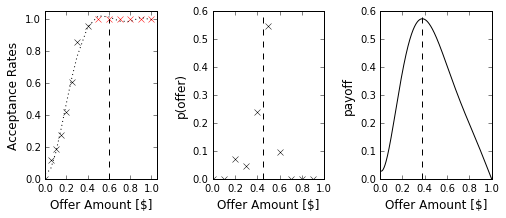

In [5]:
from pandas import *
def I(V,x):
    r=0.0
    r=r+(V[0]*pow(x,6.0)/6.0)
    r=r+(V[1]*pow(x,5.0)/5.0)
    r=r+(V[2]*pow(x,4.0)/4.0)
    r=r+(V[3]*pow(x,3.0)/3.0)
    r=r+(V[4]*pow(x,2.0)/2.0)
    r=r+(V[5]*x)
    return r
ar_values=[0.0,0.5,1.0,1.5,2.0,2.5,3,4,5,6,7,8,9,10]
ar=[0.0,0.1159,0.1884,0.2754,0.4203,0.6087,0.8551,0.9565,1.0,1.0,1.0,1.0,1.0,1.0]
m=0.0
D=0.0
for i in range(0,len(ar_values)):
    ar_values[i]=ar_values[i]/10.0
figure(num=None, figsize=(8,3), dpi=80, facecolor='w', edgecolor='k')
subplots_adjust(wspace=.50)
subplots_adjust(hspace=.25) 

for i in range(0,len(ar)):
    m=m+(float(ar[i])*float(ar_values[i]))
    D=D+float(ar[i])
m=m/D
subplot(1,3,1),plot(ar_values[:8],ar[:8],'xk')
subplot(1,3,1),plot(ar_values[8:],ar[8:],'xr')
#plot((m,m),(0,1.05),'--k')
axis((0,1.05,0,1.05))
print m
P=polyfit(ar_values,ar,5)
Y=polyval(P,ar_values)
subplot(1,3,1),plot(ar_values,Y,':k')
print P
h=(I(P,1.0)-I(P,0.0))
print h/2.0
y=[]
x=[]
lv=0.0
for i in range(0,10000):
    v=float(i)/10000.0
    x.append(v)
    nv=I(P,v)
    y.append(nv)
    if ((lv<h/2.0) & (nv>h/2.0)):
        subplot(1,3,1),plot((v,v),(0,1),'--k')
        print v
    lv=nv
ylabel('Acceptance Rates',fontsize=12)
xlabel('Offer Amount [$]',fontsize=12)
pay=[2,2.5,2.5,1,2.5,1,3,2.5,2.5,2,2.5,2.5,2.5,2.5,2.5,2,2.75,2,1,1.5,2.5,2,1.5,3,2,2,2.51,2.5,2,2.5,2.5,2.5,3,2.5,2,2.5,2,2.5,2.5,2.5,2.5,3]
for i in range(0,len(pay)):
    pay[i]=(pay[i]/5.0)
H=histogram(pay,[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
S=float(sum(H[0]))
offerY=[]
for i in range(0,len(H[0])):
    offerY.append(float(H[0][i])/float(S))
offerX=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
subplot(1,3,2),plot(offerX,offerY,'xk')
offerP=polyfit(offerX,offerY,5)
print offerY
#subplot(1,2,2),plot(offerX,polyval(offerP,offerX),':b')
subplot(1,3,2),plot((mean(pay),mean(pay)),(0,1),'--k')
axis((0,1,0,0.6))
print "mean of pay: "+str(mean(pay))
print "std of pay: "+str(std(pay))
ylabel('p(offer)',fontsize=12)
xlabel('Offer Amount [$]',fontsize=12)
A=[]
xRange=linspace(0.0,1.0,1000)
m=0.0
wo=-1.0
for xx in xRange:
    theVal=polyval(P,xx)*(1.0-xx)
    A.append(theVal)
    if theVal>m:
        wo=xx
        m=theVal
subplot(1,3,3),plot(xRange,A,'k')
subplot(1,3,3),plot((wo,wo),(0,0.6),'--k')
print "wo "+str(wo)
ylabel('payoff',fontsize=12)
xlabel('Offer Amount [$]',fontsize=12)
savefig('acceptanceRate.pdf')